In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import math
import statistics as s
from scipy import stats 
from scipy.stats import ttest_1samp

from ipywidgets import Image
from io import StringIO
import warnings
warnings.filterwarnings("ignore")
import pydotplus

from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE
# import os
# os.environ['KMP_DUPLICATE_LIB_OK']='True'


import re
import string
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

In [2]:
# import tensorflow_addons as tfa
from datetime import *
import os
import time
import re
import dask.dataframe as dd
import string
import math
import requests
import pkg_resources


from bs4 import BeautifulSoup

# pd.set_option('max_colwidth', 400)
pd.set_option('display.max_colwidth', -1)

pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Loading the Data and EDA

In [3]:
#Loading the train and test dataset

invoice_master = pd.read_csv('~/capstone/Final_invoice.csv')
parts_master = pd.read_csv('~/capstone/JTD.csv')
cust_master = pd.read_excel('~/capstone/Customer_Data.xlsx')
plant_master = pd.read_excel('~/capstone/plant master.xlsx')



invoice_master.shape, parts_master.shape, cust_master.shape, plant_master.shape, 

((492314, 59), (5619484, 10), (555338, 9), (438, 13))

In [4]:
cust_master.columns, invoice_master.columns, parts_master.columns, plant_master.columns 

(Index(['Business Partner', 'Customer No.', 'Partner Type', 'Data Origin',
        'Title', 'Marital Status', 'Occupation', 'Date of Birth', 'Death date'],
       dtype='object'),
 Index(['Unnamed: 0', 'Amt Rcvd From Custom', 'Amt Rcvd From Ins Co',
        'Area / Locality', 'CGST(14%)', 'CGST(2.5%)', 'CGST(6%)', 'CGST(9%)',
        'CITY', 'Cash /Cashless Type', 'Claim No.', 'Cust Type', 'Customer No.',
        'District', 'Expiry Date', 'Gate Pass Date', 'Gate Pass Time',
        'IGST(12%)', 'IGST(18%)', 'IGST(28%)', 'IGST(5%)', 'Insurance Company',
        'Invoice Date', 'Invoice No', 'Invoice Time', 'Job Card No',
        'JobCard Date', 'JobCard Time', 'KMs Reading', 'Labour Total', 'Make',
        'Misc Total', 'Model', 'ODN No.', 'OSL Total', 'Order Type',
        'Outstanding Amt', 'Parts Total', 'Pin code', 'Plant', 'Plant Name1',
        'Policy no.', 'Print Status', 'Recovrbl Exp', 'Regn No',
        'SGST/UGST(14%)', 'SGST/UGST(2.5%)', 'SGST/UGST(6%)', 'SGST/UGST(9%)',
 

In [190]:
invoice_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490773 entries, 0 to 492313
Data columns (total 36 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   area__locality     490773 non-null  object        
 1   city               490773 non-null  object        
 2   cust_type          490773 non-null  object        
 3   customer_no        490773 non-null  object        
 4   district           490773 non-null  object        
 5   invoice_date       490773 non-null  object        
 6   invoice_no         490773 non-null  int64         
 7   invoice_time       490773 non-null  object        
 8   job_card_no        490773 non-null  int64         
 9   jobcard_date       490773 non-null  datetime64[ns]
 10  jobcard_time       490773 non-null  object        
 11  kms_reading        490773 non-null  int64         
 12  labour_total       490773 non-null  float64       
 13  make               490773 non-null  object  

In [4]:
invoice_master.drop(columns= ['Unnamed: 0', 'Amt Rcvd From Custom', 'Amt Rcvd From Ins Co', 'CGST(14%)', 'CGST(2.5%)',
                             'CGST(6%)', 'CGST(9%)','Cash /Cashless Type', 'Claim No.','Expiry Date', 'Gate Pass Date',
                             'Gate Pass Time','IGST(12%)', 'IGST(18%)', 'IGST(28%)', 'IGST(5%)', 'Insurance Company',
                             'Policy no.','SGST/UGST(14%)', 'SGST/UGST(2.5%)', 'SGST/UGST(6%)', 'SGST/UGST(9%)',
                             'Service Advisor Name','Total CGST', 'Total GST', 'Total IGST','Total SGST/UGST'],
                   axis=1,inplace=True)

In [7]:
invoice_master.isnull().sum()

Area / Locality       23890 
CITY                  1     
Cust Type             0     
Customer No.          0     
District              0     
Invoice Date          0     
Invoice No            0     
Invoice Time          0     
Job Card No           0     
JobCard Date          0     
JobCard Time          0     
KMs Reading           0     
Labour Total          0     
Make                  0     
Misc Total            0     
Model                 1525  
ODN No.               197286
OSL Total             0     
Order Type            0     
Outstanding Amt       197286
Parts Total           0     
Pin code              0     
Plant                 0     
Plant Name1           0     
Print Status          0     
Recovrbl Exp          0     
Regn No               16    
TDS amount            197286
Technician Name       236834
Total Amt Wtd Tax.    0     
Total Value           197286
User ID               0     
dtype: int64

In [5]:
#Remove punchuation char , space from column name 
invoice_master.columns = invoice_master.columns.str.replace(r'[^\w\s]', '')
invoice_master.columns = invoice_master.columns.str.replace(' ', '_')
#convert column name to lower case
invoice_master.columns = invoice_master.columns.str.lower()

In [6]:
invoice_master.area__locality = str(invoice_master.area__locality)

invoice_master.area__locality = invoice_master.apply(
    lambda row: row['city'] if len(row['area__locality'])==0 else row['area__locality'], axis=1)


In [7]:
invoice_master.drop(columns= ['outstanding_amt','tds_amount','odn_no'],axis=1,inplace=True)

invoice_master.total_value = invoice_master.apply(
    lambda row: row['total_amt_wtd_tax'] if np.isnan(row['total_value']) else row['total_value'],
    axis=1
)

In [8]:
invoice_master.technician_name = str(invoice_master.technician_name)

invoice_master.technician_name = invoice_master.apply(
    lambda row: row['user_id'] if len(row['technician_name'])==0 else row['technician_name'],
    axis=1
)

In [9]:
invoice_master.dropna(inplace=True)

In [10]:
# Create a customised column for transaction frequency for Cusotmer

counts = invoice_master['customer_no'].value_counts().to_dict()
invoice_master['Txn_Frequency'] = invoice_master['customer_no'].map(counts)

In [11]:
# Create a customised column for labour to total ratio 

invoice_master['labour_to_total']= invoice_master['labour_total']/ invoice_master['total_value']

In [12]:
# invoice_master.invoice_date_time= invoice_master.apply(lambda r : pd.datetime.combine(r['invoice_date'],r['invoice_time']),1)

invoice_master['invoice_date_time']= pd.to_datetime(invoice_master['invoice_date']+' ' + invoice_master['invoice_time'])
invoice_master['jobcard_date_time']= pd.to_datetime(invoice_master['jobcard_date']+' ' + invoice_master['jobcard_time'])

invoice_master['service_time'] =  invoice_master.invoice_date_time - invoice_master.jobcard_date_time

invoice_master.service_time = invoice_master['service_time'].apply(lambda x: pd.Timedelta(x).total_seconds()/3600) 

In [13]:

invoice_master.jobcard_date = pd.to_datetime(invoice_master.jobcard_date)

invoice_master['jobcard_dow'] = invoice_master.jobcard_date.dt.day_name()

invoice_master['jobcard_moy'] = invoice_master.jobcard_date.dt.month_name()

In [14]:
invoice_master['invoice_date']=pd.to_datetime(invoice_master['invoice_date'])
invoice_master['invoice_year']=invoice_master['invoice_date'].dt.year
invoice_master['invoice_month']=invoice_master['invoice_date'].dt.month

In [15]:
# invoice_master['state_code'] = invoice_master['regn_no'][0:2]

invoice_master['state_code'] = invoice_master['regn_no'].apply(lambda x: x[0:2]) 

In [11]:
# invoice_master.sample(5).T
# invoice_master.head().T
# invoice_master.columns

In [16]:
parts_master.columns = parts_master.columns.str.replace(' ', '_')
parts_master.columns = map(str.lower, parts_master.columns)

In [17]:
parts_master.drop(columns= ['unnamed:_0','labor_value_number'],axis=1,inplace=True)
parts_master.dropna(inplace = True)

In [18]:
parts_master.rename(columns={'dbm_order':'job_card_no'},inplace=True)
order_counts = pd.merge(parts_master, invoice_master, how= 'inner' ,on='job_card_no')

In [19]:
parts_master.shape, invoice_master.shape, order_counts.shape

((5567855, 8), (490773, 39), (3058846, 46))

In [22]:
# invoice_master.head().T

## Customer Analysis

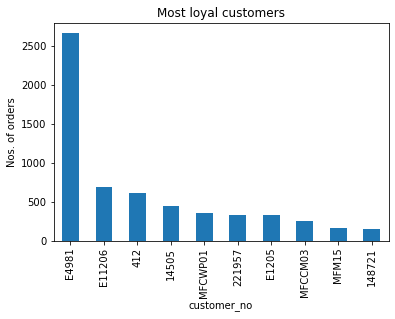

customer_no
E4981      2666
E11206     688 
412        610 
14505      441 
MFCWP01    353 
221957     333 
E1205      323 
MFCCM03    251 
MFM15      156 
148721     145 
Name: Txn_Frequency, dtype: int64

In [44]:
invoice_master[invoice_master.invoice_year == 2016].groupby(['customer_no'])['Txn_Frequency'].mean().nlargest(10).plot(ylabel = "Nos. of orders", title= "Most loyal customers", kind = 'bar')

plt.show()

invoice_master[invoice_master.invoice_year == 2016].groupby(['customer_no'])['Txn_Frequency'].mean().nlargest(10)

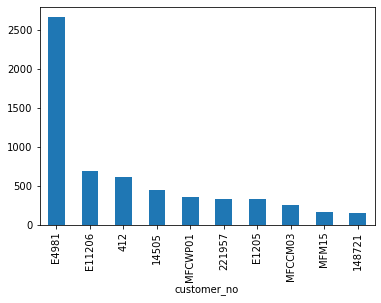

customer_no
E4981      2666
E11206     688 
412        610 
14505      441 
MFCWP01    353 
221957     333 
E1205      323 
MFCCM03    251 
MFM15      156 
148721     145 
Name: Txn_Frequency, dtype: int64

In [41]:
invoice_master.groupby(['customer_no'])['Txn_Frequency'].mean().nlargest(10).plot(kind = 'bar')

plt.show()

invoice_master.groupby(['customer_no'])['Txn_Frequency'].mean().nlargest(10)

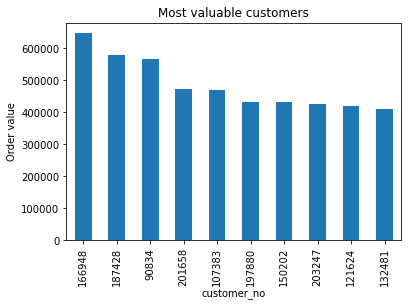

customer_no
166948   648203.490
187428   580852.260
90834    565487.200
201658   473700.380
107383   471385.830
197880   431130.420
150202   431113.430
203247   424928.820
121624   419840.660
132481   410517.030
Name: total_value, dtype: float64

In [45]:
invoice_master.groupby(['customer_no'])['total_value'].mean().nlargest(10).plot(ylabel = "Order value", title= "Most valuable customers", kind = 'bar')

plt.show()

invoice_master.groupby(['customer_no'])['total_value'].mean().nlargest(10)



## Order Type Analysis

order_type
Accidental          4893.452
WBW Order           1587.574
SMC Value Package   1561.923
Paid Service        1506.591
Mechanical          1085.312
Running Repairs     797.234 
SMC Redemption      45.118  
Repeat Order        0.299   
Workshop Damage     0.000   
Name: labour_total, dtype: float64

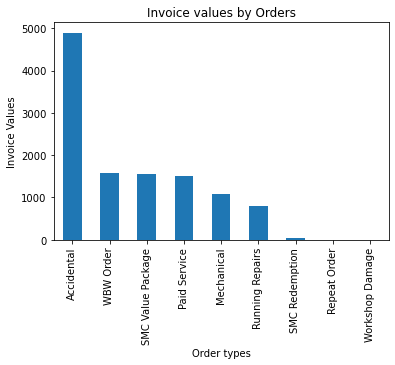

In [21]:
invoice_master.groupby(['order_type'])['labour_total'].mean().sort_values(ascending = False).plot(kind = 'bar')
plt.show
plt.xlabel('Order types')
plt.ylabel('Invoice Values')
plt.title("Invoice values by Orders")

invoice_master.groupby(['order_type'])['labour_total'].mean().sort_values(ascending = False)

In [13]:
service_types = invoice_master.order_type.unique()
service_types

array(['Paid Service', 'SMC Value Package', 'Running Repairs',
       'SMC Redemption', 'Accidental', 'Repeat Order', 'Workshop Damage',
       'Mechanical', 'WBW Order'], dtype=object)

Running Repairs      268549
Paid Service         134690
Accidental           44040 
SMC Redemption       15636 
Mechanical           15091 
SMC Value Package    9719  
Repeat Order         3015  
WBW Order            17    
Workshop Damage      16    
Name: order_type, dtype: int64

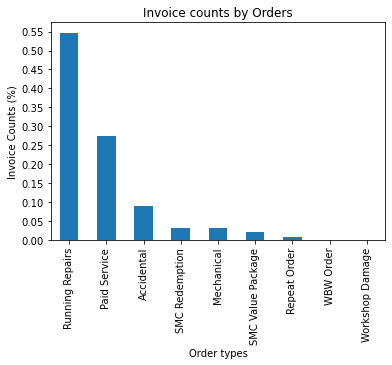

In [24]:
invoice_master['order_type'].value_counts(normalize=True).plot(kind = 'bar')
plt.yticks(np.arange(0,0.6, .05))
plt.xlabel('Order types')
plt.ylabel('Invoice Counts (%)')
plt.title("Invoice counts by Orders")

invoice_master['order_type'].value_counts()

order_type
Workshop Damage     922.640
Accidental          230.573
WBW Order           121.700
Mechanical          85.412 
Paid Service        84.754 
Repeat Order        78.668 
SMC Redemption      64.698 
Running Repairs     62.258 
SMC Value Package   10.296 
Name: service_time, dtype: float64

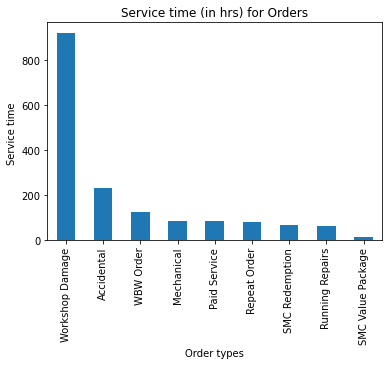

In [27]:
invoice_master.groupby(['order_type'])['service_time'].mean().sort_values(ascending = False).plot(kind = 'bar')

plt.xlabel('Order types')
plt.ylabel('Service time ')
plt.title("Service time (in hrs) for Orders")

invoice_master.groupby(['order_type'])['service_time'].mean().sort_values(ascending = False)

order_type
Accidental          68967.288
Mechanical          84671.379
Paid Service        80111.545
Repeat Order        74674.149
Running Repairs     78727.171
SMC Redemption      64615.873
SMC Value Package   61739.089
WBW Order           53638.647
Workshop Damage     64022.438
Name: kms_reading, dtype: float64

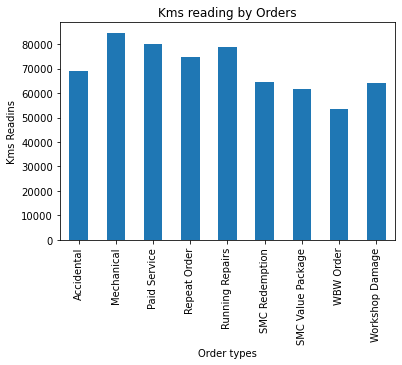

In [29]:
# Running quantum for different orders type

invoice_master.groupby(['order_type'])['kms_reading'].mean().plot(kind = 'bar')

plt.xlabel('Order types')
plt.ylabel('Kms Readins')
plt.title("Kms reading by Orders")
plt.show
invoice_master.groupby(['order_type'])['kms_reading'].mean()

# invoice_master[invoice_master.order_type == 'Paid Service']['kms_reading'].mean()

In [30]:
# Average running kms across orders

invoice_master['kms_reading'].mean()

77601.81761425344

order_type
Accidental          537962547.500
Running Repairs     461845442.810
Paid Service        440578528.830
Mechanical          31017061.120 
SMC Value Package   19686857.530 
SMC Redemption      943436.860   
WBW Order           104289.300   
Repeat Order        3106.740     
Workshop Damage     0.000        
Name: profit, dtype: float64

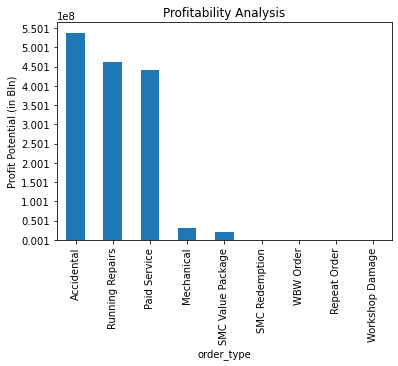

In [48]:
a.profit.sort_values(ascending = False).plot(ylabel='Profit Potential (in Bln)', title = 'Profitability Analysis',kind = 'bar')
plt.yticks(np.arange(100000,600000000, 50000000))

a.profit.sort_values(ascending = False)

# a.plot(y=["profit"], ylabel='Profit Potential', title = 'Profitability Analysis',kind = 'bar')
# a.plot(y=['total_value'], ax=ax, secondary_y=True, mark_right=False, marker='o', linestyle='-')
# ax.right_ax.set_ylabel('Total Value')
# plt.show()

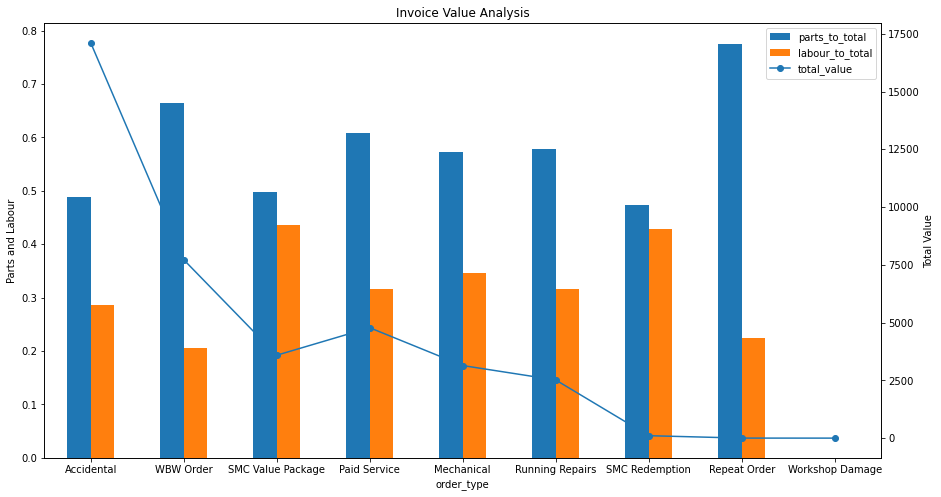

,labour_total,parts_total,order_frequency,total_value,labour_to_total,parts_to_total,profit
order_type,,,,,,,
Accidental,4893.452,8356.454,44040,17108.769,0.286,0.488,537962547.500
Running Repairs,797.234,1456.540,268549,2517.015,0.317,0.579,461845442.810
Paid Service,1506.591,2904.564,134690,4777.647,0.315,0.608,440578528.830
Mechanical,1085.312,1798.845,15091,3140.647,0.346,0.573,31017061.120
SMC Value Package,1561.923,1783.548,9719,3587.528,0.435,0.497,19686857.530
SMC Redemption,45.118,49.944,15636,105.455,0.428,0.474,943436.860
WBW Order,1587.574,5137.179,17,7722.238,0.206,0.665,104289.300
Repeat Order,0.299,1.030,3015,1.329,0.225,0.775,3106.740
Workshop Damage,0.000,0.000,16,0.000,nan,nan,0.000


In [34]:
a = invoice_master.groupby(['order_type'])['labour_total'].mean().sort_values(ascending = False).to_frame()
a['parts_total'] = invoice_master.groupby(['order_type'])['parts_total'].mean()
a['order_frequency'] = invoice_master['order_type'].value_counts()
a['total_value'] = invoice_master.groupby(['order_type'])['total_value'].mean()
a['labour_to_total'] = a.labour_total/a.total_value 
a['parts_to_total'] = a.parts_total/a.total_value 
a['profit'] = (a.total_value - a.labour_total) * a.order_frequency
a.profit.sort_values(ascending = False)
a.sort_values(by=['profit'], ascending = False)


ax =  a.plot(y=["parts_to_total", "labour_to_total"], ylabel='Parts and Labour', title = 'Invoice Value Analysis',kind = 'bar', figsize=(15, 8))
a.plot(y=['total_value'], ax=ax, secondary_y=True, mark_right=False, marker='o', linestyle='-')
ax.right_ax.set_ylabel('Total Value')
plt.show()

a.sort_values(by=['profit'], ascending = False)

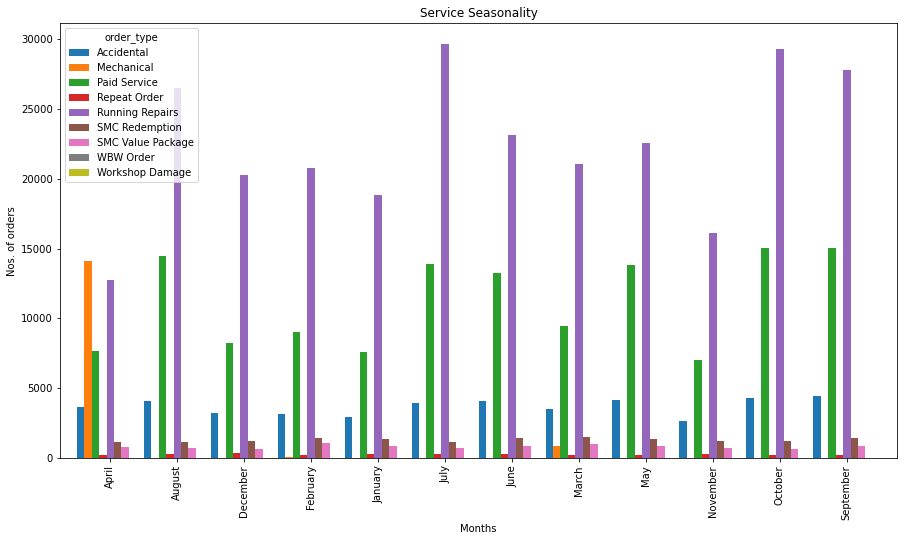

In [56]:
# Service seasonality 

invoice_master.groupby(['jobcard_moy'])['order_type'].value_counts().unstack().plot(title = "Service Seasonality", xlabel = "Months", ylabel = "Nos. of orders", kind = 'bar', figsize = (15,8), width = 1)
plt.show()

# Mechanical has strong seasonality rest all not seasonal

<AxesSubplot:xlabel='invoice_date', ylabel='total_value'>

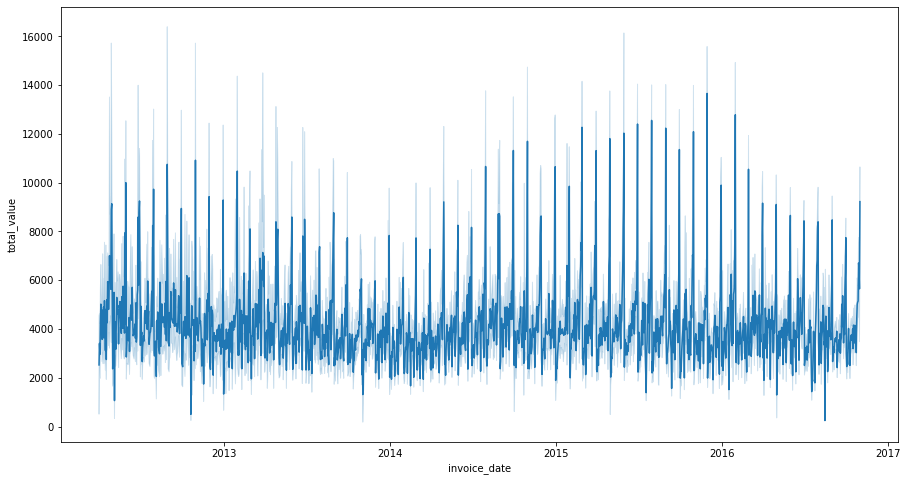

In [20]:
plt.figure(figsize = (15,8))

sns.lineplot(x ="invoice_date" , y="total_value", data = invoice_master)

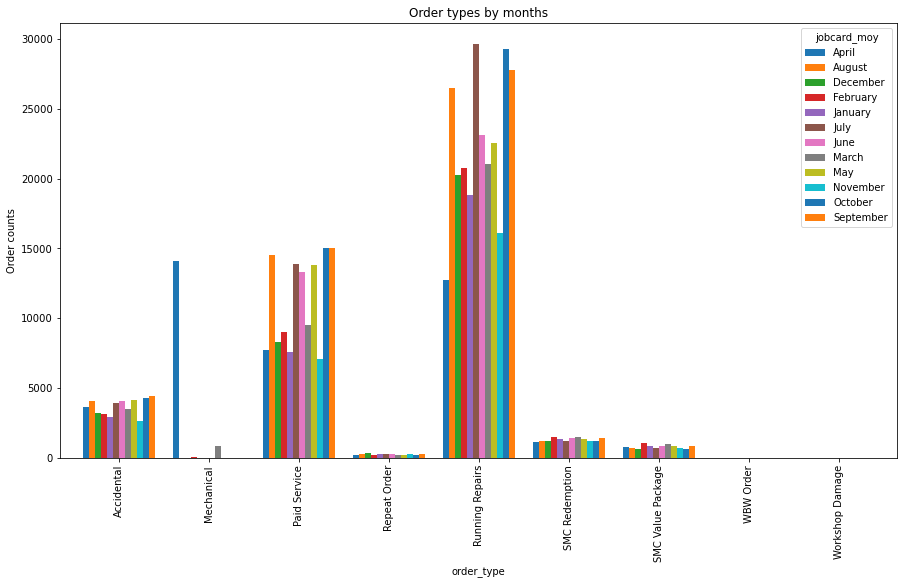

In [62]:
# invoice_master[invoice_master.order_type == 'Accidental']['jobcard_moy'].value_counts().plot(kind = 'bar')
# invoice_master[invoice_master.order_type == 'Accidental']['jobcard_moy'].value_counts()

invoice_master.groupby(['order_type'])['jobcard_moy'].value_counts().unstack().plot(ylabel = "Order counts",title = "Order types by months", kind = 'bar', figsize = (15,8), width = .8)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

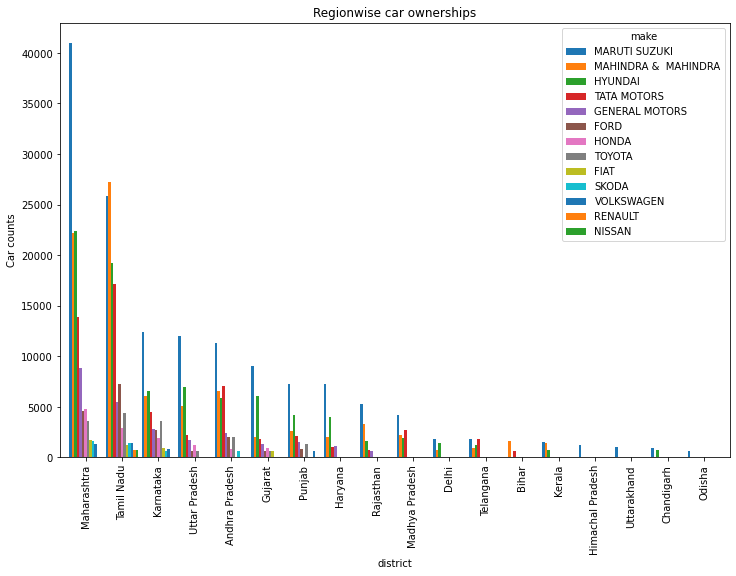

In [63]:
invoice_master.groupby(['district'])['make'].value_counts().nlargest(100).unstack().plot(ylabel = "Car counts", title = "Regionwise car ownerships", kind = 'bar', figsize = (12,8), width = .9)
plt.show

<AxesSubplot:title={'center':'Orders types by regions'}, xlabel='district', ylabel='Order counts'>

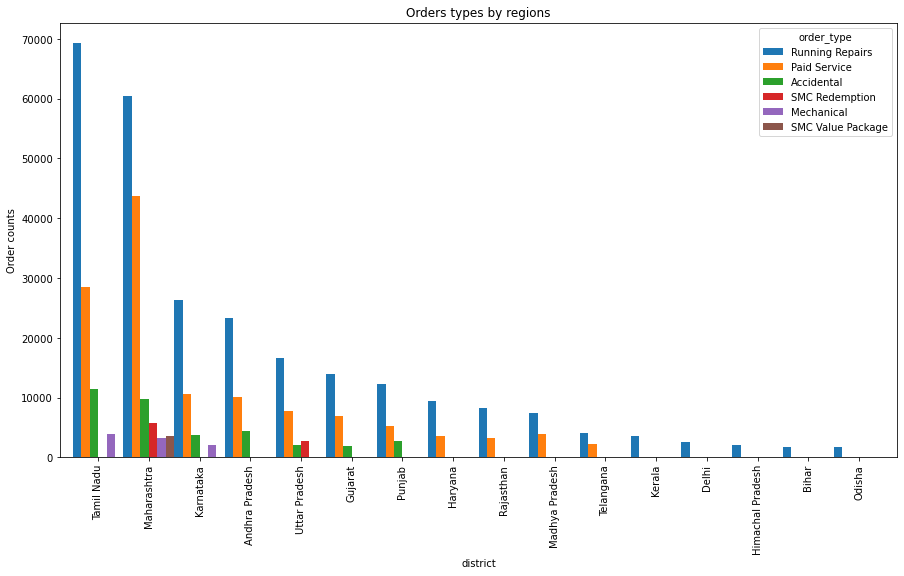

In [72]:
invoice_master.groupby(['district'])['order_type'].value_counts().nlargest(40).unstack().plot(ylabel = "Order counts", title = "Orders types by regions", kind = 'bar', figsize = (15,8), width = 1)

## Accidental order type analysis

<AxesSubplot:title={'center':'Cars involved in maximum accidents'}, ylabel='Nos. of accidents'>

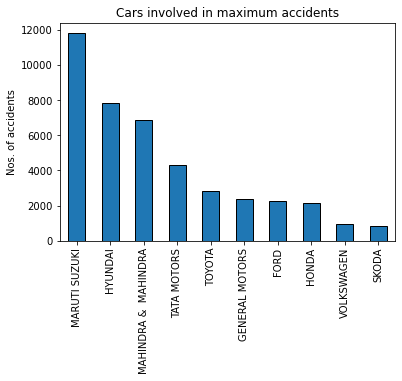

In [20]:
invoice_master[invoice_master.order_type == 'Accidental']['make'].value_counts().nlargest(10).plot(ylabel = "Nos. of accidents", title= "Cars involved in maximum accidents", kind = 'bar',  edgecolor='black')

SWIFT          3402
ALTO           2081
SWIFT DZIRE    1858
WAGONR         1399
RITZ           635 
800            404 
ERTIGA         350 
ZEN            289 
OMNI           277 
SX4            271 
Name: model, dtype: int64

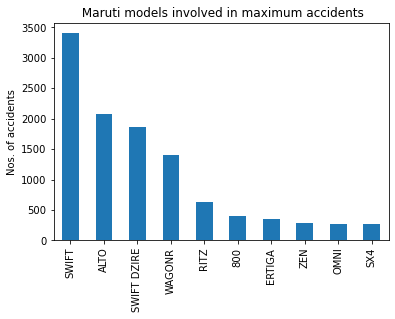

In [21]:
invoice_master[(invoice_master.order_type == 'Accidental') & (invoice_master.make == 'MARUTI SUZUKI')]['model'].value_counts().nlargest(10).plot(ylabel = "Nos. of accidents", title= " Maruti models involved in maximum accidents", kind = 'bar')

invoice_master[(invoice_master.order_type == 'Accidental') & (invoice_master.make == 'MARUTI SUZUKI')]['model'].value_counts().nlargest(10)

PAINTING CHARGES             1763
REPAIRING CHARGES            1196
CLIP                         1112
MISC_OTHER CHARGES           1017
REMOVE REFITTING CHARGES     710 
HOLDER, FR BUMPER SIDE RH    589 
BUMPER, FRONT (BLACK)        513 
BUMPER FRONT                 444 
REMOVE & REFIT CHARGES       413 
HOLDER, FR BUMPER SIDE LH    394 
Name: description, dtype: int64

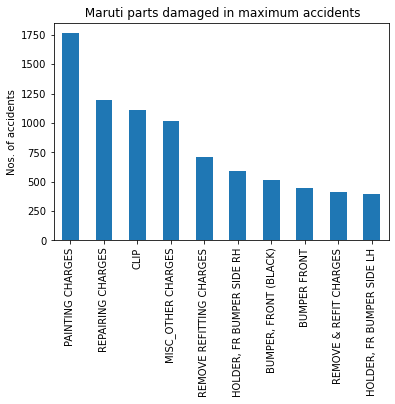

In [22]:
order_counts[(order_counts.order_type == 'Accidental') & (order_counts.model == 'SWIFT')]['description'].value_counts().nlargest(10).plot(ylabel = "Nos. of accidents", title= " Maruti parts damaged in maximum accidents", kind = 
'bar')
order_counts[(order_counts.order_type == 'Accidental') & (order_counts.model == 'SWIFT')]['description'].value_counts().nlargest(10)

<AxesSubplot:title={'center':'Type of customers involved in maximum accidents'}, xlabel='make', ylabel='Nos. of accidents'>

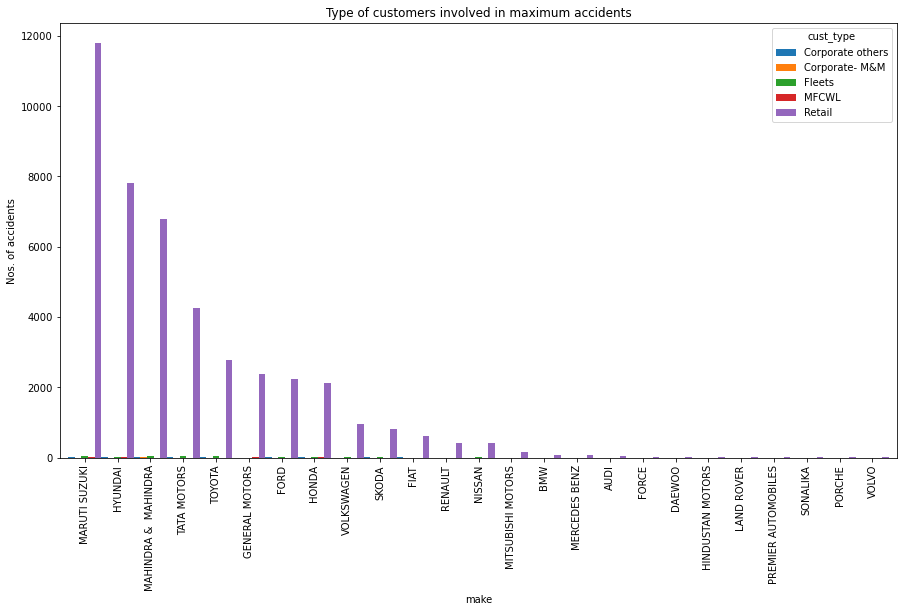

In [28]:
# invoice_master[(invoice_master.order_type == 'Accidental') & (invoice_master.state_code == 'MH')].groupby(['make'])['cust_type'].value_counts().unstack().plot(kind='bar', figsize = (15,8))

invoice_master[(invoice_master.order_type == 'Accidental')].groupby(['make'])['cust_type'].value_counts().nlargest(50).unstack().plot(ylabel = "Nos. of accidents", title= "Type of customers involved in maximum accidents",kind='bar', figsize = (15,8), width = 1)

make
PREMIER AUTOMOBILES    3572.566
SONALIKA               448.553 
FORCE                  446.268 
TATA MOTORS            284.065 
MAHINDRA &  MAHINDRA   282.844 
NISSAN                 267.113 
FIAT                   259.529 
GENERAL MOTORS         244.179 
DAEWOO                 237.181 
FORD                   235.470 
Name: service_time, dtype: float64

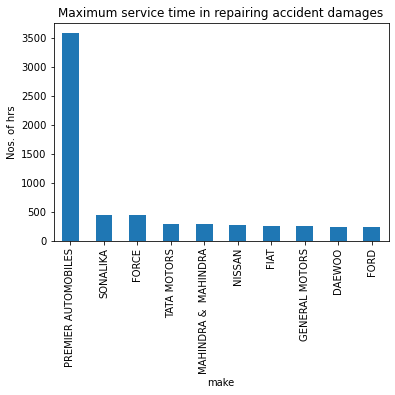

In [29]:
invoice_master[invoice_master.order_type == 'Accidental'].groupby(['make'])['service_time'].mean().nlargest(10).plot(ylabel = "Nos. of hrs", title= "Maximum service time in repairing accident damages",kind='bar')

invoice_master[invoice_master.order_type == 'Accidental'].groupby(['make'])['service_time'].mean().nlargest(10)

make
MARUTI SUZUKI           11823
HYUNDAI                 7825 
MAHINDRA &  MAHINDRA    6859 
TATA MOTORS             4297 
TOYOTA                  2827 
GENERAL MOTORS          2381 
FORD                    2249 
HONDA                   2120 
VOLKSWAGEN              955  
SKODA                   824  
Name: service_time, dtype: int64

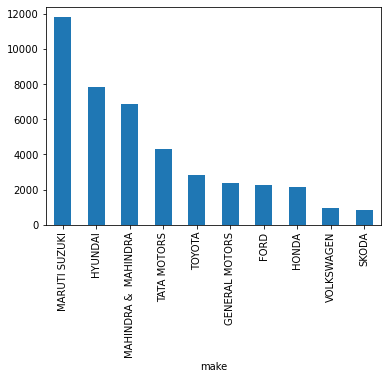

In [58]:
# Highest service time frequencies for makes

invoice_master[invoice_master.order_type == 'Accidental'].groupby(['make'])['service_time'].count().nlargest(10).plot(kind='bar')

invoice_master[invoice_master.order_type == 'Accidental'].groupby(['make'])['service_time'].count().nlargest(10)

Tamil Nadu        11460
Maharashtra       9848 
Andhra Pradesh    4368 
Karnataka         3788 
Punjab            2691 
Uttar Pradesh     2100 
Gujarat           1929 
Haryana           1591 
Madhya Pradesh    1270 
Delhi             934  
Name: district, dtype: int64

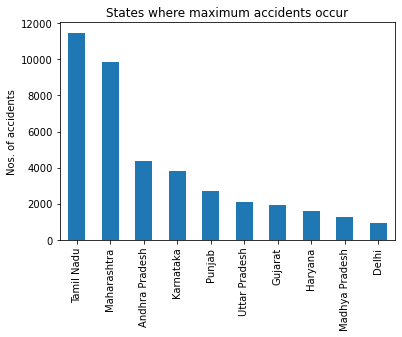

In [31]:
# invoice_master.groupby(['order_type'])['district'].value_counts().nlargest(10).sort_values(ascending = True)

# Area wise accidents pattern 

# invoice_master.groupby(['order_type'])['district'].filter(lambda group: group.size > 100)

invoice_master[invoice_master.order_type == 'Accidental']['district'].value_counts().nlargest(10).plot(ylabel = "Nos. of accidents", title= "States where maximum accidents occur", kind = 'bar')

invoice_master[invoice_master.order_type == 'Accidental']['district'].value_counts().nlargest(10)


September    4423
October      4273
May          4133
August       4096
June         4093
July         3945
April        3631
March        3500
December     3221
February     3141
January      2930
November     2654
Name: jobcard_moy, dtype: int64

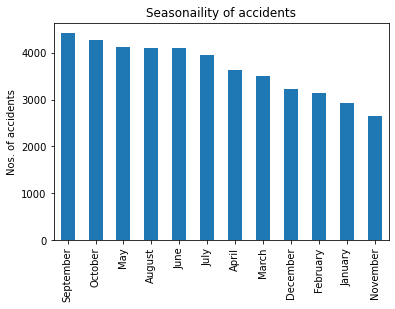

In [36]:
# Nos of accidents on different months of the year

invoice_master[invoice_master.order_type == 'Accidental']['jobcard_moy'].value_counts().plot(ylabel = "Nos. of accidents", title= "Seasonaility of accidents", kind = 'bar')
invoice_master[invoice_master.order_type == 'Accidental']['jobcard_moy'].value_counts()


Monday       8000
Tuesday      7513
Wednesday    7431
Thursday     6912
Friday       6362
Saturday     5971
Sunday       1851
Name: jobcard_dow, dtype: int64

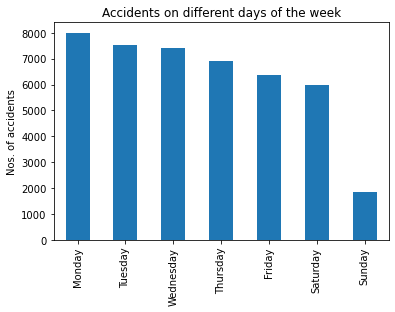

In [37]:
# Nos of accidents on different days of the week

invoice_master[invoice_master.order_type == 'Accidental']['jobcard_dow'].value_counts().plot(ylabel = "Nos. of accidents", title= "Accidents on different days of the week",kind = 'bar')
invoice_master[invoice_master.order_type == 'Accidental']['jobcard_dow'].value_counts()


In [71]:
# order_counts.groupby(['order_item','order_type']).size().unstack().plot(kind='bar', stacked=True, figsize=(15,15))

# order_counts.groupby(['order_item','order_type']).size().nlargest(10)

order_item  order_type     
10          Running Repairs    232719
20          Running Repairs    154458
10          Paid Service       120555
30          Running Repairs    118742
20          Paid Service       109186
30          Paid Service       102653
40          Paid Service       94533 
            Running Repairs    93514 
50          Paid Service       86589 
60          Paid Service       78359 
dtype: int64

## Car ownership analysis

<AxesSubplot:title={'center':'Car ownerships across states'}, ylabel='Nos. of cars'>

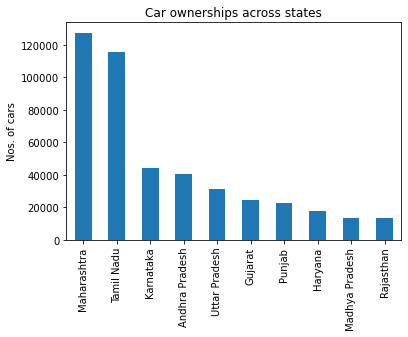

In [38]:
# invoice_master.groupby(['state_code'])['make'].count()
invoice_master['district'].value_counts().nlargest(10).plot(ylabel = "Nos. of cars", title= "Car ownerships across states",kind = 'bar')

## Plant anaysis

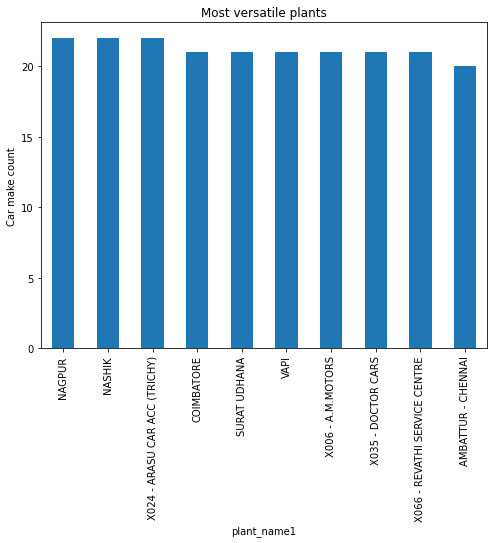

plant_name1
X024 - ARASU CAR ACC (TRICHY)    22
NASHIK                           22
NAGPUR                           22
X066 - REVATHI SERVICE CENTRE    21
X035 - DOCTOR CARS               21
X006 - A.M.MOTORS                21
VAPI                             21
SURAT UDHANA                     21
COIMBATORE                       21
AMBATTUR - CHENNAI               20
Name: make, dtype: int64

In [87]:
# Maximum varities of makes seriveced by a plant
invoice_master.groupby(['plant_name1'])['make'].nunique().nlargest(10).plot(figsize = (8, 6), ylabel = "Car make count", title= "Most versatile plants", kind = 'bar')
plt.show()

invoice_master.groupby(['plant_name1'])['make'].nunique().nlargest(10).sort_values(ascending = False)

plant_name1
X316 - K & S AUTO                0.874
X259 - ROUNAK MOTORS             0.891
X124 - ZEF MOTORS                0.897
X320 - BARUAH AUTOMOBILE CENTR   0.920
X081 - GEO MOTORS                0.922
X034 - SOHAMM MOTORS             0.943
X432 - HARSH AUTOMOBILES         0.978
X201 - ADITYA AUTO WORLD         0.998
X206 - SHRI SAI SHAKTI SERVICE   1.000
X211 -  M/S KAMAL MOTORS         1.000
Name: labour_to_total, dtype: float64

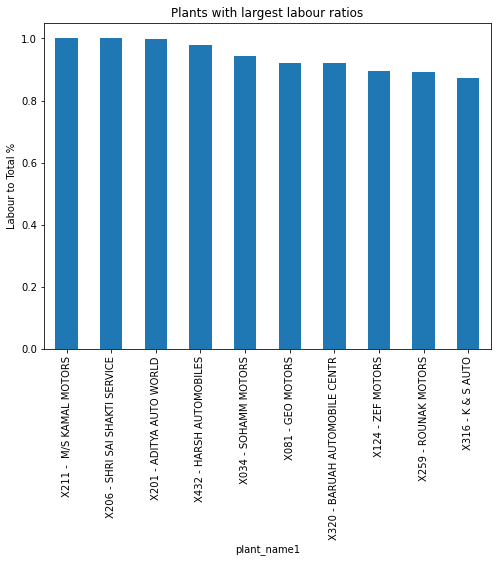

In [90]:
# 10 Largest Labour ratio for a plants

invoice_master.groupby(['plant_name1'])['labour_to_total'].mean().nlargest(10).sort_values(ascending = False).plot(figsize = (8,6),ylabel = "Labour to Total %", title= "Plants with largest labour ratios", kind = 'bar')

invoice_master.groupby(['plant_name1'])['labour_to_total'].mean().nlargest(10).sort_values(ascending = True)



<AxesSubplot:title={'center':'Top 10 large value Plants'}, xlabel='plant_name1', ylabel='Order value'>

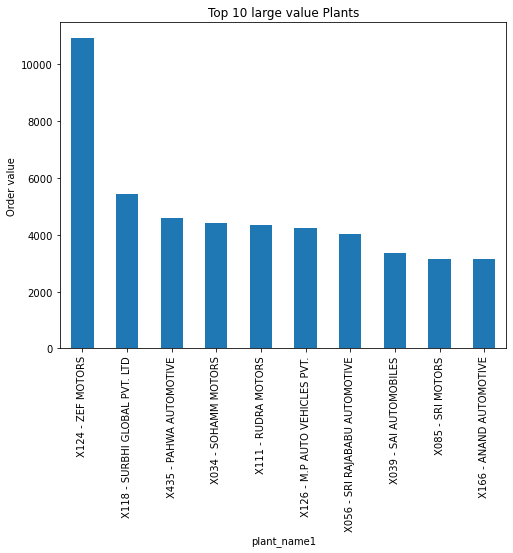

In [91]:
# 10 Largest Labour total for plants

invoice_master.groupby(['plant_name1'])['labour_total'].mean().nlargest(10).sort_values(ascending = False).plot(figsize = (8,6),ylabel = "Order value", title= "Top 10 large value Plants", kind = 'bar')

# invoice_master.groupby(['plant_name1'])['labour_total'].mean().sort_values(ascending = False)

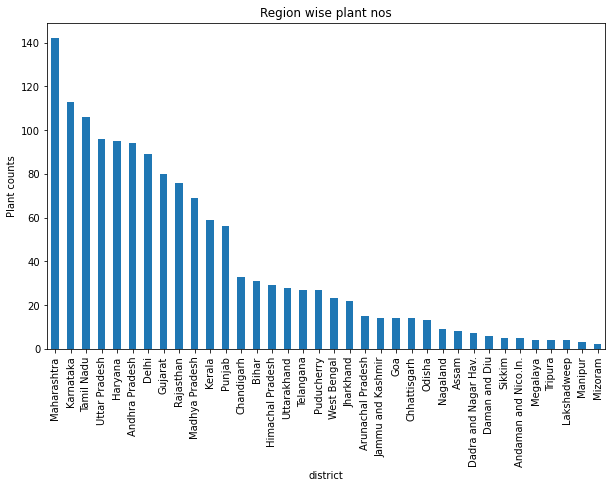

district
Maharashtra             127494
Tamil Nadu              115766
Karnataka               44078 
Andhra Pradesh          40552 
Uttar Pradesh           31489 
Gujarat                 24368 
Punjab                  22678 
Haryana                 17881 
Madhya Pradesh          13597 
Rajasthan               13466 
Telangana               7741  
Kerala                  5986  
Delhi                   5402  
Chandigarh              3318  
Himachal Pradesh        3315  
Bihar                   3258  
Uttarakhand             2541  
Odisha                  2305  
Puducherry              1716  
West Bengal             1332  
Dadra and Nagar Hav.    907   
Chhattisgarh            622   
Daman and Diu           436   
Jharkhand               256   
Assam                   100   
Arunachal Pradesh       62    
Goa                     24    
Nagaland                24    
Jammu and Kashmir       21    
Andaman and Nico.In.    8     
Lakshadweep             7     
Megalaya                7     

In [94]:
# Total frequency across makes

invoice_master.groupby(['district'])['plant_name1'].nunique().sort_values(ascending = False).plot(kind = 'bar', ylabel = "Plant counts", title= "Region wise plant nos", figsize = (10, 6))
plt.show()

invoice_master.groupby(['district'])['plant_name1'].count().sort_values(ascending = False)

## CLTV calculation

In [98]:
# Lifetime customer Value

## customer average expenditures per visit -> total value of of all invoices / total number of invoices 

s = (sum(invoice_master.groupby(['customer_no'])["total_value"].sum()))/invoice_master.groupby(['customer_no'])["invoice_no"].count().sum()

print("customer average expenditures per visit", s, '\n')

## customer purchase frequency -> total number of invoices / total number of unique customers

f = invoice_master["invoice_no"].count() / invoice_master['customer_no'].nunique()

print("customer purchase frequency", f, '\n')

## Customer value -> s * f

x = s * f

print("customer value", x, '\n')

## Customer average lifespan

a = invoice_master.groupby(['customer_no'])["invoice_year"].value_counts().unstack()
a = a.fillna(0)
# a['csum'] = a[2012] + a[2013] + a[2014] + a[2015] +a[2016]
a['Csum'] = np.count_nonzero(a, axis=1) # u can use the following as well a['Csum'] = a.ne(0).sum(axis=1)
y = a.Csum.mean()

print("customer average lifespan", y, '\n')

print("customer churn rate", 1/y, '\n')

CLTV = x * y

print("customer life time value", CLTV)


customer average expenditures per visit 4395.026011720601 

customer purchase frequency 1.9410033815183214 

customer value 8530.760350610668 

customer average lifespan 1.211556487175938 

customer churn rate 0.8253845450746892 

customer life time value 10335.498043325633
